In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential,load_model,Model
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import TensorBoard

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
feature=list(test.columns)

In [4]:
train_arr  = train.iloc[:,1:].copy()
test_arr  = test.iloc[:,:].copy()
train_arr = train_arr.to_numpy().reshape(len(train_arr),28,28)#转化成矩阵形式
train_y = train.iloc[:,0].to_numpy()
test_arr = test_arr.to_numpy().reshape(len(test_arr),28,28)#转化成矩阵形式

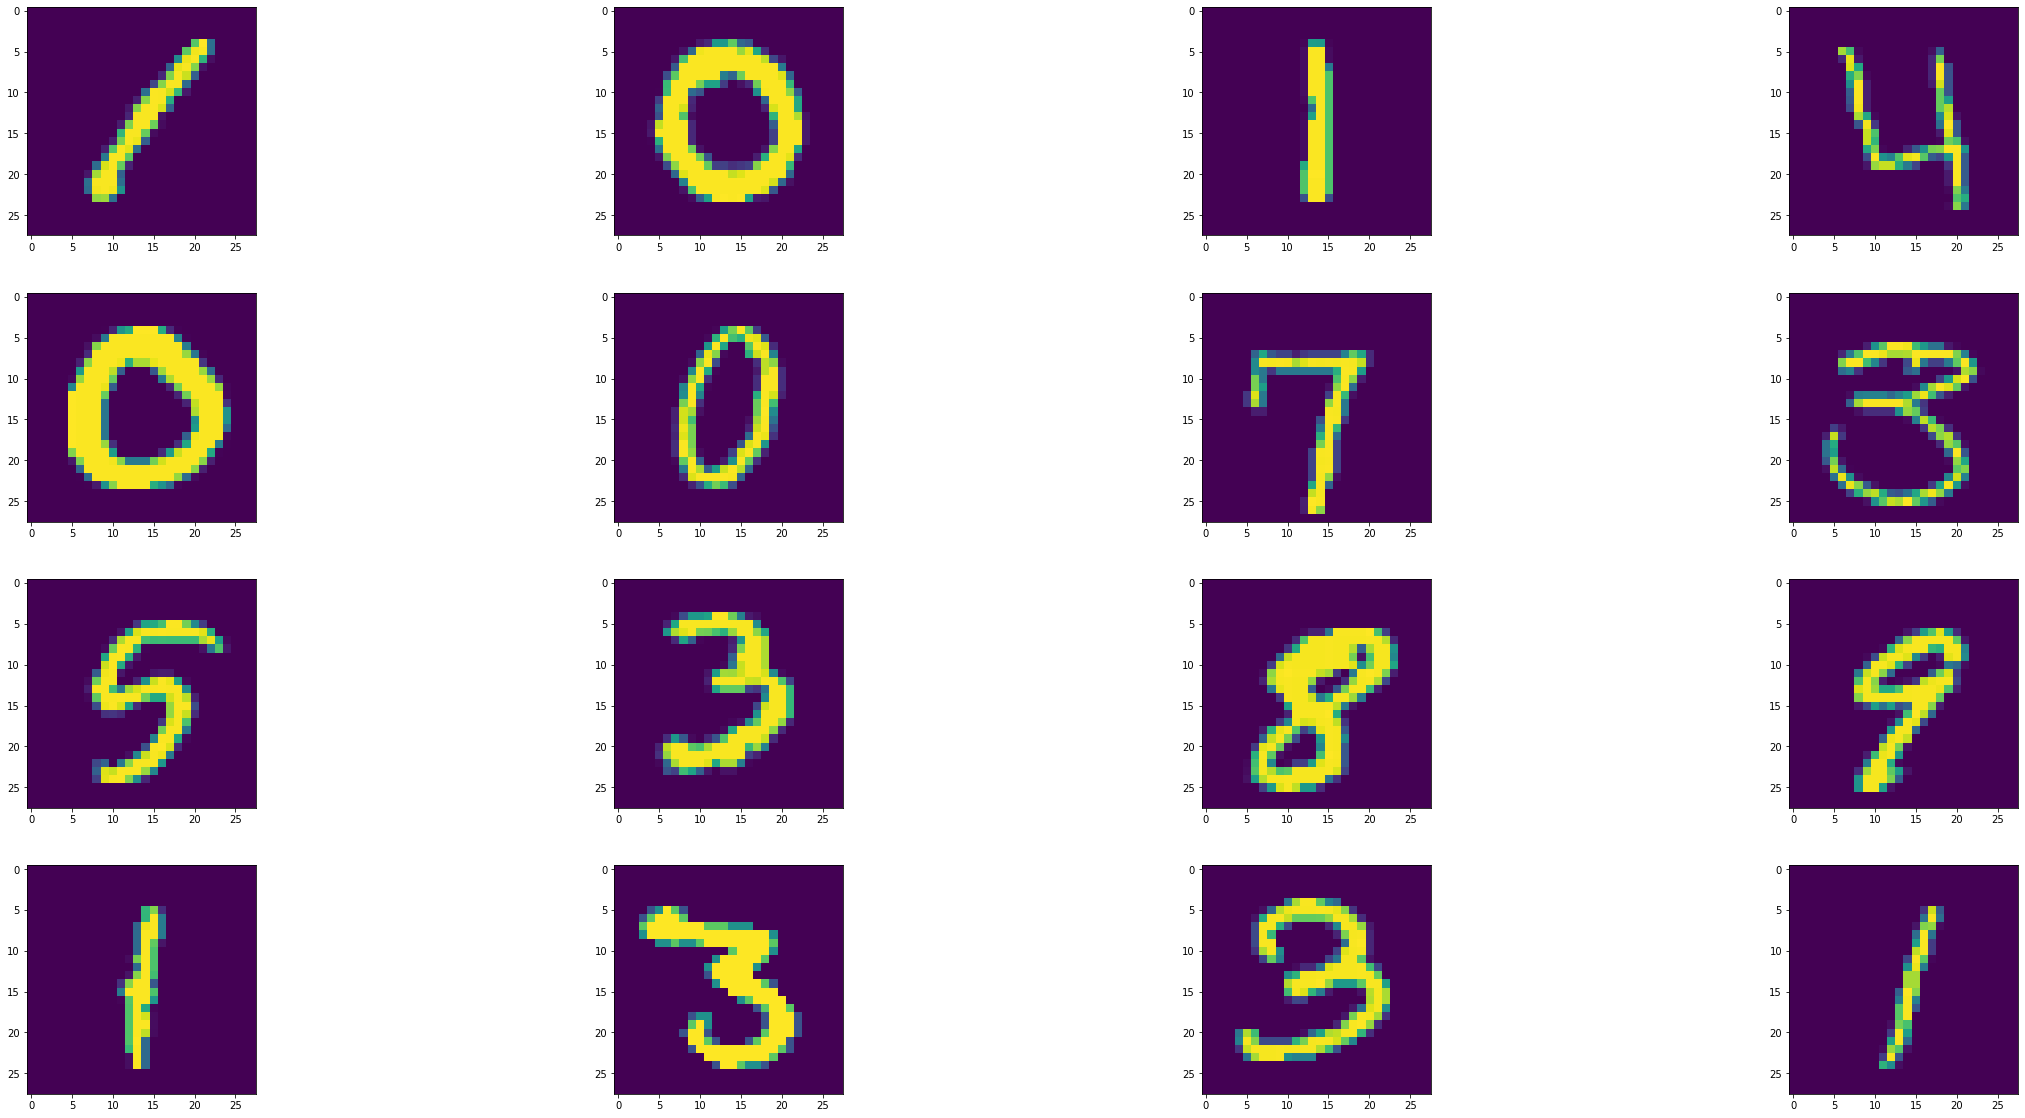

In [15]:
fig = plt.figure(figsize=(40, 20))
rows = 4
columns = 4
grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .25)#自定义子图设置
for i in range(rows*columns):
    exec (f"plt.subplot(grid{[i]})")
    plt.imshow(train_arr[i])#绘制热图，根据值的大小确定颜色

In [5]:
scaler = StandardScaler()
#label = train["label"]
#label.value_counts()
train_data = scaler.fit_transform(train[feature])#对数据进行归一化
test_data  = scaler.transform(test)

In [6]:
train_y = train.iloc[:,0].to_numpy()

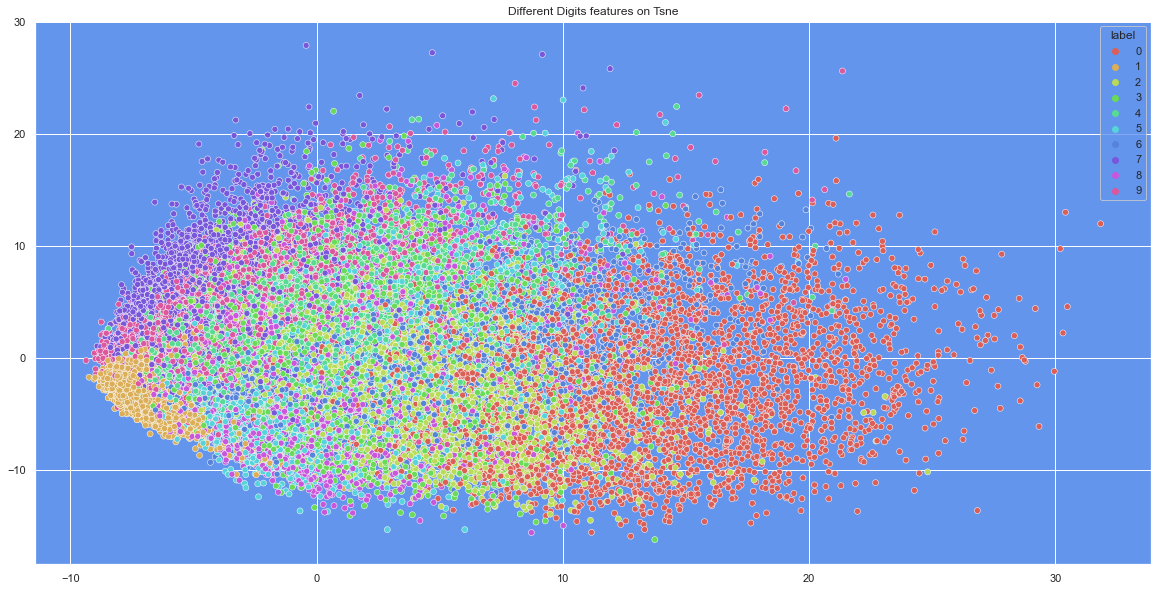

In [17]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(train)
fig = plt.figure(figsize=(20, 10))
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');
plt.title("Different Digits features on Tsne")
plt.show()

In [7]:
#创建网络
def build_network(input_features=None):
    inputs = Input(shape=(input_features,), name="input")
    x = Dense(512, activation='relu', name="hidden1")(inputs)
    x = Dense(256, activation='relu', name="hidden2")(x)
    x = Dense(128, activation='relu', name="hidden3")(x)
    x = Dense(32, activation='relu', name="hidden4")(x)
    out = Dense(10, activation='softmax', name="output")(x)
    model = Model(inputs=inputs, outputs=out)
    model.compile(optimizer='adam', loss='categorical_crossentropy', 
    metrics=["accuracy"])
    return model

In [8]:
def create_callbacks():
    tensorboard_callback = TensorBoard(log_dir='~/ch3_tb_log/mlp',  
      histogram_freq=1, batch_size=32, write_graph=True, 
        write_grads=False)
    return [tensorboard_callback]

In [9]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
x_train, x_val, y_train, y_val = train_test_split(train_data,train_y,test_size = 0.1,random_state=22)

In [10]:
model = build_network(x_train.shape[1])
callbacks = create_callbacks()
model.fit(x_train, y_train,
          batch_size=30,
          epochs=50,
          validation_data=(x_val, y_val),
          verbose=1,
          callbacks=callbacks)

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 15s 393us/sample - loss: 0.2726 - accuracy: 0.9200 - val_loss: 0.1359 - val_accuracy: 0.9581
Epoch 2/50
37800/37800 [==============================] - 13s 353us/sample - loss: 0.1295 - accuracy: 0.9622 - val_loss: 0.1345 - val_accuracy: 0.9593
Epoch 3/50
37800/37800 [==============================] - 13s 335us/sample - loss: 0.0954 - accuracy: 0.9722 - val_loss: 0.1100 - val_accuracy: 0.9674
Epoch 4/50
37800/37800 [==============================] - 15s 394us/sample - loss: 0.0770 - accuracy: 0.9769 - val_loss: 0.1221 - val_accuracy: 0.9662
Epoch 5/50
37800/37800 [==============================] - 13s 342us/sample - loss: 0.0590 - accuracy: 0.9824 - val_loss: 0.1186 - val_accuracy: 0.9655
Epoch 6/50
37800/37800 [==============================] - 13s 338us/sample - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.1346 - val_accuracy: 0.9705
Epoch 7/50
37800/37800 [=====================

In [ ]:
!tensorboard --logdir=//Users//MC//Desktop//Term2//Machinelearning//~//ch3_tb_log//mlp//


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6007/ (Press CTRL+C to quit)
